In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

## First reformat groups to simple repeat - Alu - satellite

In [2]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HC02666_finalized.txt') as f:
    Lines = f.readlines()
    
    AluFlag = 0
    aluEnd =0
    
    AluCasetteDict = {}
    group = 0
    AluCasetteDict[str(group)]=[]

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
            
        if AluFlag == 0:
            
            if goodLine.split(" ")[11] == 'SINE/Alu':
                aluEnd=int(goodLine.split(" ")[7].strip())
                AluCasetteDict[str(group)].append(goodLine)
                AluFlag+=1
                
            else:
                continue
                
        else:
            
            
            if int(goodLine.split(" ")[6])-int(aluEnd) < 4000:
                
                AluCasetteDict[str(group)].append(goodLine)

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())

                else:
                    continue
                    
            else:
                
                group+=1
                AluCasetteDict[str(group)]=[]

                if goodLine.split(" ")[11] == 'SINE/Alu':
                    aluEnd=int(goodLine.split(" ")[7].strip())
                    AluCasetteDict[str(group)].append(goodLine)

                else:
                    continue
                    

            
    
    
    f.close()

100%|█████████████████████████████████| 22892/22892 [00:00<00:00, 321559.33it/s]


In [3]:
AluCasetteDict

{'0': ['45594 1333 20.2 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30358347 30358634 24423823 True AluY SINE/Alu 12 289 17 36435 False',
  '45595 4010 9.5 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30358638 30359205 24423252 True HSATI Satellite 0 568 1 36436 False',
  '45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30359213 30360754 24421703 False (TA)n Simple_repeat 1 1634 0 36437 False',
  '45597 1464 17.9 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30360759 30361047 24421410 True AluY SINE/Alu 15 286 13 36438 True',
  '45598 4061 9.3 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30361047 30361614 24420843 True HSATI Satellite 0 568 1 36439 False',
  '45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30361622 30363166 24419291 False (TATATAA)n Simple_repeat 1 1548 0 36440 False',
  '45600 1413 18.3 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02

In [4]:
goodKeys = []
for x in AluCasetteDict.keys():
    if len(AluCasetteDict[x])>0:
        goodKeys.append(x)
        

goodAluGroupDict={}
tallyCount=0
for x in AluCasetteDict.keys():
    if x in goodKeys:
        goodAluGroupDict[tallyCount] = AluCasetteDict[x]
        tallyCount+=1
        continue
    else:
        continue

In [5]:
repeatBlocks = goodAluGroupDict.copy()

In [6]:
firstAlus = [repeatBlocks[x][0] for x in list(repeatBlocks.keys())[:-3]]
print(len(firstAlus))

23


In [7]:
lastAlus = []
for key in list(repeatBlocks.keys())[:-3]:
    lastAlu = 'temp'
    for repeat in repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            lastAlu=repeat
        else:
            continue
    lastAlus.append(lastAlu)
print(len(lastAlus))

23


In [8]:
LineNumbers = {'First':[], 'Last':[]}
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HC02666_finalized.txt') as f:
    Lines = f.readlines()
    
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        if goodLine.split(" ")[11] == 'SINE/Alu':
            if goodLine in firstAlus:
                LineNumbers['First'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            elif goodLine in lastAlus:
                LineNumbers['Last'].append(str(goodLine)+" "+str(lineNum))
                lineNum+=1
            else:
                lineNum+=1
                
        else:
            lineNum+=1

100%|█████████████████████████████████| 22892/22892 [00:00<00:00, 260753.63it/s]


In [9]:
new_repeatBlocks = {x:[] for x in list(repeatBlocks.keys())[:-3]}

In [10]:
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HC02666_finalized.txt') as f:
    Lines = f.readlines()
    

    groups = list(new_repeatBlocks.keys())
    groupNum = 0
    
    for group in groups:
        
        lineNum = 0
        for line in tqdm(Lines): 

            goodLine = ' '.join(line.split())

            if int(lineNum) == (int(LineNumbers['First'][groupNum].split(" ")[-1].strip())-1) and (int(LineNumbers['First'][groupNum].split(" ")[6].strip())-int(goodLine.split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)   
                lineNum+=1
            elif int(lineNum) >= int(LineNumbers['First'][groupNum].split(" ")[-1].strip()) and int(lineNum) <= int(LineNumbers['Last'][groupNum].split(" ")[-1].strip()):
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            elif int(lineNum) == (int(LineNumbers['Last'][groupNum].split(" ")[-1].strip())+1) and (int(goodLine.split(" ")[6].strip()) - int(LineNumbers['Last'][groupNum].split(" ")[7].strip())) <= 4000:
                new_repeatBlocks[group].append(goodLine)
                lineNum+=1
            else:
                lineNum+=1
                                                                                                  
        groupNum+=1

100%|█████████████████████████████████| 22892/22892 [00:00<00:00, 279925.97it/s]


In [11]:
for x in list(repeatBlocks.keys())[-3:]:
    new_repeatBlocks[x] = repeatBlocks[x] 

In [12]:
goodAluGroupDict = new_repeatBlocks.copy()

In [13]:
RepeatBlockLengths = []
for key in new_repeatBlocks.keys():
    RepeatBlockLengths.append((int(new_repeatBlocks[key][-1].split(" ")[7].strip())-int(new_repeatBlocks[key][0].split(" ")[6].strip()))+1)

In [14]:
#exportListDF = pd.DataFrame(data=RepeatBlockLengths, columns=['RepeatBlockLength'])
#exportListDF.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/ListCSVs/HC02666_RepeatBlock.csv")

In [15]:
AllAlus = 0
for key in new_repeatBlocks.keys():
    totalAlus = 0
    for repeat in new_repeatBlocks[key]:
        if 'SINE/Alu' in repeat:
            totalAlus+=1
            AllAlus+=1
        else:
            continue
            
    print("Repeat Block: "+str(key))
    print("Total Alus: "+str(totalAlus))
print("All Alus: "+str(AllAlus))

Repeat Block: 0
Total Alus: 14
Repeat Block: 1
Total Alus: 17
Repeat Block: 2
Total Alus: 24
Repeat Block: 3
Total Alus: 145
Repeat Block: 4
Total Alus: 115
Repeat Block: 5
Total Alus: 112
Repeat Block: 6
Total Alus: 97
Repeat Block: 7
Total Alus: 187
Repeat Block: 8
Total Alus: 130
Repeat Block: 9
Total Alus: 321
Repeat Block: 10
Total Alus: 220
Repeat Block: 11
Total Alus: 163
Repeat Block: 12
Total Alus: 232
Repeat Block: 13
Total Alus: 231
Repeat Block: 14
Total Alus: 182
Repeat Block: 15
Total Alus: 195
Repeat Block: 16
Total Alus: 250
Repeat Block: 17
Total Alus: 284
Repeat Block: 18
Total Alus: 645
Repeat Block: 19
Total Alus: 67
Repeat Block: 20
Total Alus: 20
Repeat Block: 21
Total Alus: 10
Repeat Block: 22
Total Alus: 11
Repeat Block: 23
Total Alus: 9
Repeat Block: 24
Total Alus: 23
Repeat Block: 25
Total Alus: 31
All Alus: 3735


In [16]:
endBlockList = [str(x) for x in list(new_repeatBlocks.keys())[-3:]]

In [17]:
#This code makes one file with the coordinates of each Alu in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Alus/HC02666/HC02666_RepeatBlock_Alus.txt", 'a+') as file:
    for key in new_repeatBlocks.keys():
        for repeat in new_repeatBlocks[key]:
            if 'SINE/Alu' in repeat:
                if str(repeat.split(" ")[9]) == 'True':
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")
                    else:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")
                else:
                    if str(key) in endBlockList:
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

                    else:  
                        file.write("RepeatBlock "+str(key)+"\t"+str(repeat.split(" ")[5])+":"+str(repeat.split(" ")[6])+"-"+str(repeat.split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

## Repeat Distribution

In [18]:
####################### WORKING ONE ###############################################################################

In [19]:
goodAluGroupDict

{0: ['45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30356992 30358346 24424111 False (ATATAAT)n Simple_repeat 1 1371 0 36434 False',
  '45594 1333 20.2 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30358347 30358634 24423823 True AluY SINE/Alu 12 289 17 36435 False',
  '45595 4010 9.5 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30358638 30359205 24423252 True HSATI Satellite 0 568 1 36436 False',
  '45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30359213 30360754 24421703 False (TA)n Simple_repeat 1 1634 0 36437 False',
  '45597 1464 17.9 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30360759 30361047 24421410 True AluY SINE/Alu 15 286 13 36438 True',
  '45598 4061 9.3 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30361047 30361614 24420843 True HSATI Satellite 0 568 1 36439 False',
  '45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666

In [20]:
GroupSubBlock = {}

for key in goodAluGroupDict.keys():
    
    temporaryGroup = goodAluGroupDict[key].copy()

    
    #Initialize
    interGroup = []
    tempList = []
    first = 0
    second = 0
    switch = 'temp'
    flag=0
    check=0
    lastCheck=0

    groupCount = 0
    
    #Loop through Block
    for repeat in temporaryGroup:
        
        if repeat == temporaryGroup[-1]:
            tempList.append(repeat)
            interGroup.append(tempList)
            
        else:

            if switch == str(repeat.split(" ")[11].strip()) and lastCheck==1:
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                lastCheck=1
                #continue

            elif lastCheck==1 and switch != str(repeat.split(" ")[11].strip()) and str(repeat.split(" ")[11].strip()) != 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                switch = str(repeat.split(" ")[11].strip())
                first=1
                lastCheck=0
                second=0
                check=0
                flag=0

            elif lastCheck==1 and str(repeat.split(" ")[11].strip()) == 'SINE/Alu':
                interGroup.append(tempList)
                tempList = []
                tempList.append(repeat)
                lastCheck=0
                first=1
                second=0
                check=0
                flag=1


            ################# If there is no repeats in the group yet / New Group #############################

            else:

                if first==0:

                    if 'SINE/Alu' in repeat:
                        tempList = []
                        tempList.append(repeat)
                        first=1
                        second=0
                        flag=1

                    else:
                        tempList = []
                        tempList.append(repeat)
                        switch= str(repeat.split(" ")[11].strip())
                        first=1
                        second=0
                        flag=0
                        check=0

                ######################### If there is one repeat already ################################     

                elif first == 1 and second == 0:

                    if flag == 1:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)

                            tempList = []
                            tempList.append(repeat)
                            second = 0
                            flag=1
                            first=1

                        else:

                            check=1
                            first=1
                            second=1
                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip()) 


                    else:

                        if 'SINE/Alu' in repeat:
                            tempList.append(repeat)
                            first=1
                            second = 1
                            check=0

                        else:

                            if str(repeat.split(" ")[11].strip()) == switch:
                                tempList.append(repeat)
                                second=0
                                first=1
                                flag=0

                            else:
                                tempList = []
                                tempList.append(repeat)
                                switch= str(repeat.split(" ")[11].strip())
                                first=1
                                second=0
                                flag=0
                                check=0
                                #print("ERROR 1")
                                #print(key)
                                #print(tempList)
                                #print(repeat)


                elif first == 1 and second == 1:

                    if check == 1:

                        #If the third is the same append
                        if switch == str(repeat.split(" ")[11].strip()):
                            tempList.append(repeat)
                            first=1
                            second=0
                            flag=1
                            check=0

                        else:

                            #Start a new group
                            if 'SINE/Alu' in repeat:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                flag=1
                                check=0
                                first=1
                                second=0

                            else:
                                interGroup.append(tempList)
                                tempList = []
                                tempList.append(repeat)
                                switch = str(repeat.split(" ")[11].strip())
                                flag=0
                                first=1
                                check=0
                                second=0

                    else:

                        if 'SINE/Alu' in repeat:
                            interGroup.append(tempList)
                            tempList = []
                            tempList.append(repeat)
                            flag=1
                            first=1
                            check=0
                            second=0

                        else:

                            tempList.append(repeat)
                            switch = str(repeat.split(" ")[11].strip())
                            lastCheck=1

    
    GroupSubBlock[key]= []
    for listGroup in interGroup:
        GroupSubBlock[key].append(listGroup)

In [21]:
OrientationDict = {'True':'C', 'False':'+'}
repeatBlock_distList = []

for key in GroupSubBlock.keys():

    for group in GroupSubBlock[key]:
        #print(group)
        
        groupStart = int(group[0].split(" ")[6].strip())
        groupEnd = int(group[-1].split(" ")[7].strip())
        alu = 'temp'
        
        for repeat in group:
            if 'SINE/Alu' in repeat :
                alu = OrientationDict[str(repeat.split(" ")[9].strip())]+"_"+str(repeat.split(" ")[10].strip())+"_"+str(repeat.split(" ")[6].strip())+"-"+str(repeat.split(" ")[7].strip())
            else:
                continue
                
        repeatBlock_distList.append([int(key), alu, ((groupEnd-groupStart)+1), group])

In [22]:
repeatBlock_distList

[[0,
  'C_AluY_30358347-30358634',
  2214,
  ['45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30356992 30358346 24424111 False (ATATAAT)n Simple_repeat 1 1371 0 36434 False',
   '45594 1333 20.2 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30358347 30358634 24423823 True AluY SINE/Alu 12 289 17 36435 False',
   '45595 4010 9.5 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30358638 30359205 24423252 True HSATI Satellite 0 568 1 36436 False']],
 [0,
  'C_AluY_30360759-30361047',
  2402,
  ['45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30359213 30360754 24421703 False (TA)n Simple_repeat 1 1634 0 36437 False',
   '45597 1464 17.9 0.0 5.5 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30360759 30361047 24421410 True AluY SINE/Alu 15 286 13 36438 True',
   '45598 4061 9.3 0.0 0.0 chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000749.HC02666 30361047 30361614 24420843 True HSATI Satellite 0 568 1 36

In [31]:
import json
#with open('/home/mark/Desktop/chromosome_y/json_dict/HC02666_cluster.json', 'w') as fp:
#    json.dump(GroupSubBlock, fp)

In [23]:
rb_df = pd.DataFrame(data=repeatBlock_distList, columns=['RepeatBlock','Alu','Lengths','Group'])

In [24]:
#Make sure not to keep all rows as some are "graveyard" blocks (last 3 Repeat Blocks)
rb_df

,RepeatBlock,Alu,Lengths,Group
0,0,C_AluY_30358347-30358634,2214,[45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PAR...
1,0,C_AluY_30360759-30361047,2402,[45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PAR...
2,0,C_AluY_30363169-30363457,2403,[45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PAR...
3,0,C_AluY_30365580-30365868,2404,[45602 379 26.2 3.0 4.2 chrY.01-24.01.PAR1-PAR...
4,0,C_AluY_30367996-30368286,2418,[45605 390 18.8 9.1 2.7 chrY.01-24.01.PAR1-PAR...
...,...,...,...,...
3730,25,+_AluSx_54438944-54439272,551,[65992 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-PA...
3731,25,+_AluJb_54440400-54440550,1012,[65994 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR2...
3732,25,+_AluSp_54440551-54440848,298,[65996 2102 12.8 0.7 0.3 chrY.01-24.01.PAR1-PA...
3733,25,+_AluJb_54440849-54441008,772,[65997 1569 19.5 0.0 6.5 chrY.01-24.01.PAR1-PA...


In [25]:
#This code makes one file with the coordinates of each DYZ in each repeatblock
#with open("/home/mark/Desktop/chromosome_y/repeatBlockFiles/DYZ/HC02666/HC02666_RepeatBlock_DYZs.txt", 'a+') as file:
    for row in rb_df.index:
        if 'C_' in str(rb_df.at[row,'Alu']):
            
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('C_antisense')+"\t"+"REPEATBLOCK"+"\n")

        else:
            if str(rb_df.at[row,'RepeatBlock']) in endBlockList:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"GRAVEYARD"+"\n")

            else:
                file.write("RepeatBlock "+str(rb_df.at[row,'RepeatBlock'])+"\t"+str(rb_df.at[row,'Group'][0].split(" ")[5])+":"+str(rb_df.at[row,'Group'][0].split(" ")[6])+"-"+str(rb_df.at[row,'Group'][-1].split(" ")[7])+"\t"+str('+_sense')+"\t"+"REPEATBLOCK"+"\n")

    file.close()

IndentationError: unexpected indent (1365226536.py, line 3)

In [26]:
rb_df['Color'] = 'temp'
rb_df['Block_Size'] = 'temp'

for entry in rb_df.index:
    
    if rb_df.at[entry,'RepeatBlock'] > 22:
        
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = 'black'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'
        
    else:
    
    
        if int(rb_df.at[entry,'Lengths']) <= 999:
            rb_df.at[entry,'Color'] = '#073B4C'
            rb_df.at[entry,'Block_Size'] = '<999'

        elif int(rb_df.at[entry,'Lengths']) >= 1000 and int(rb_df.at[entry,'Lengths']) <= 1999:
            rb_df.at[entry,'Color'] = '#118AB2'
            rb_df.at[entry,'Block_Size'] = '1000-1999'

        elif int(rb_df.at[entry,'Lengths']) >= 2000 and int(rb_df.at[entry,'Lengths']) <= 2999:
            rb_df.at[entry,'Color'] = '#06D6A0'
            rb_df.at[entry,'Block_Size'] = '2000-2999'

        elif int(rb_df.at[entry,'Lengths']) >= 3000 and int(rb_df.at[entry,'Lengths']) <= 3999:
            rb_df.at[entry,'Color'] = '#FFD166'
            rb_df.at[entry,'Block_Size'] = '3000-3999'
        else:
            rb_df.at[entry,'Color'] = 'magenta'


In [28]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HC02666/HC02666_rbDF.csv")

In [37]:
import collections
for x,y in collections.Counter(rb_df[rb_df['RepeatBlock']<23]['Color']).items():
    print(x)
    print(int(y)/len(rb_df[rb_df['RepeatBlock']<23]['Color']))

#06D6A0
0.9787581699346405
#118AB2
0.012254901960784314
#073B4C
0.005718954248366013
#FFD166
0.0032679738562091504


In [38]:
tmpSatellitesList=[]
tmpSatellitesLength=[]

import ast
for x in rb_df[rb_df['RepeatBlock']<23]['Group']:
    for repeat in x:
        if 'Satellite' in repeat:
            tmpSatellitesList.append(repeat.split(" ")[10].strip())
            tmpSatellitesLength.append((int(repeat.split(" ")[7].strip())-int(repeat.split(" ")[6].strip()))+1)

In [39]:
import collections
print(collections.Counter(tmpSatellitesList))
print("\n")
print(collections.Counter(tmpSatellitesLength))

Counter({'HSATI': 3668})


Counter({568: 3327, 567: 172, 569: 73, 564: 20, 566: 19, 134: 17, 439: 12, 437: 6, 560: 6, 563: 5, 562: 5, 543: 2, 142: 1, 464: 1, 565: 1, 546: 1})


In [35]:
#################################################################################

In [40]:
rb_df

,RepeatBlock,Alu,Lengths,Group,Color,Block_Size
0,0,C_AluY_30358347-30358634,2214,[45593 372 23.4 4.5 3.3 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1,0,C_AluY_30360759-30361047,2402,[45596 372 19.8 8.9 2.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
2,0,C_AluY_30363169-30363457,2403,[45599 400 24.7 3.9 3.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
3,0,C_AluY_30365580-30365868,2404,[45602 379 26.2 3.0 4.2 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
4,0,C_AluY_30367996-30368286,2418,[45605 390 18.8 9.1 2.7 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
...,...,...,...,...,...,...
3730,25,+_AluSx_54438944-54439272,551,[65992 2114 13.0 0.7 0.0 chrY.01-24.01.PAR1-PA...,black,<999
3731,25,+_AluJb_54440400-54440550,1012,[65994 18 21.8 0.0 0.0 chrY.01-24.01.PAR1-PAR2...,black,1000-1999
3732,25,+_AluSp_54440551-54440848,298,[65996 2102 12.8 0.7 0.3 chrY.01-24.01.PAR1-PA...,black,<999
3733,25,+_AluJb_54440849-54441008,772,[65997 1569 19.5 0.0 6.5 chrY.01-24.01.PAR1-PA...,black,<999


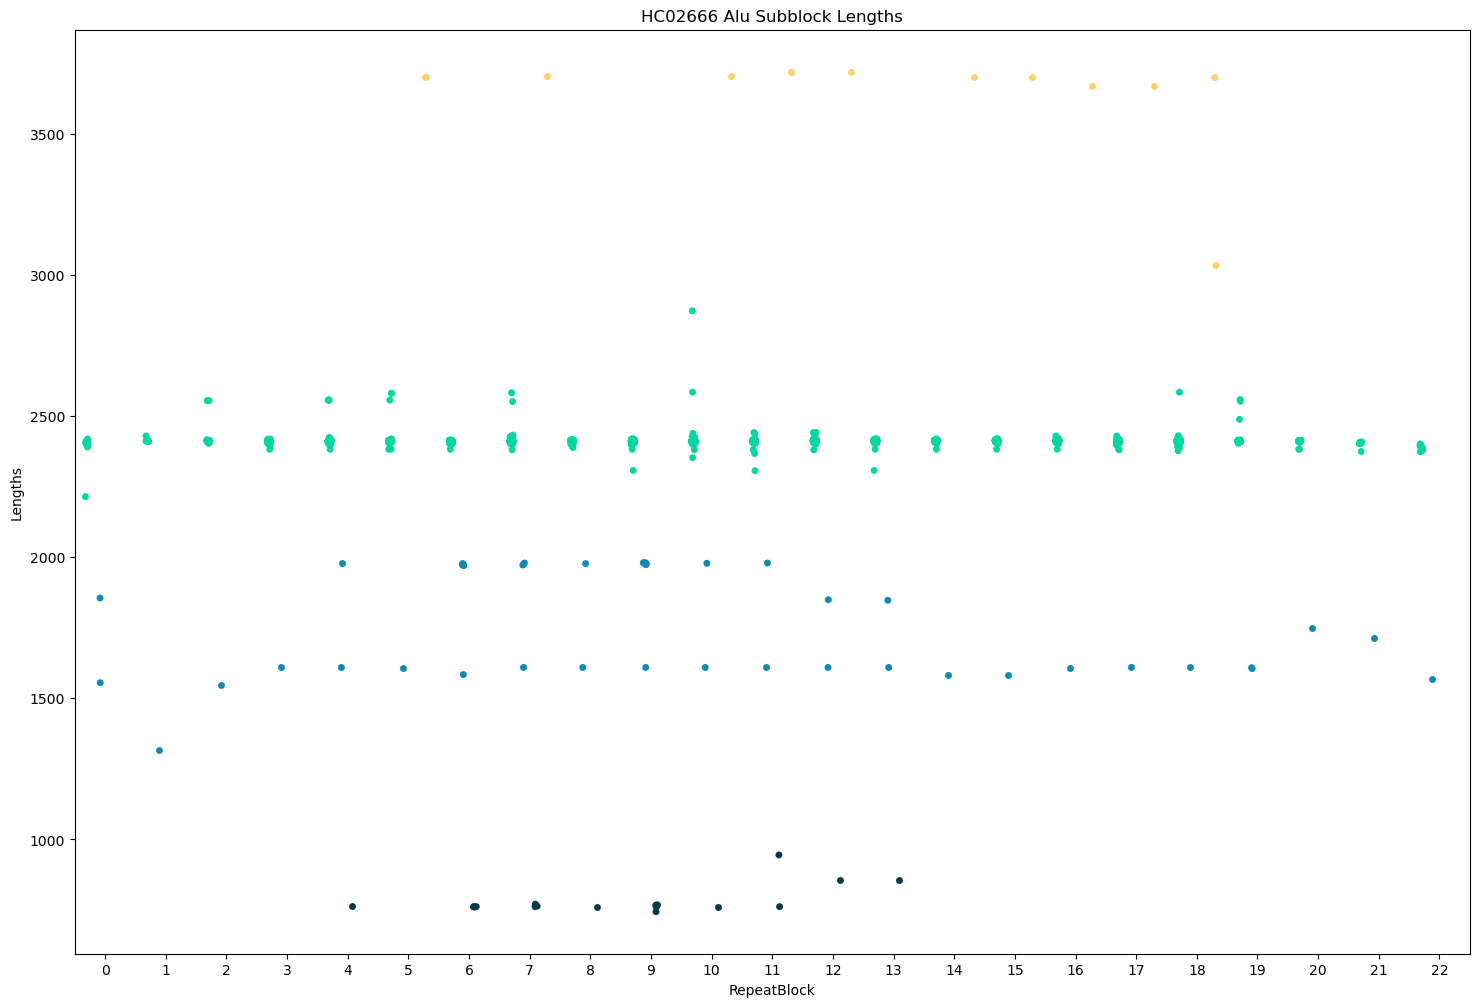

In [41]:
from matplotlib import rcParams
palette = {x:x for x in set(rb_df['Color'])}

plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 18,12
plt.title("HC02666 Alu Subblock Lengths")
ax=sns.stripplot(x="RepeatBlock", y="Lengths", data=rb_df[rb_df['RepeatBlock']<23], hue='Color', palette=palette, dodge=True)
ax.get_legend().remove()
plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_AluSubBlock_dots.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [42]:
temprbDF3 = rb_df[rb_df['RepeatBlock']<23].reset_index().set_index("RepeatBlock").copy()
heatDF = pd.DataFrame(index=set(temprbDF3.index), columns=set(temprbDF3['Color'])).fillna(0)
heatDF.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for key,value in dict(collections.Counter(temprbDF3.loc[block]['Color'])).items():
        #print(key)
        #print(value)
        heatDF.at[block,key]+= int(value)
heatDF.head()

,#118AB2,#FFD166,#06D6A0,#073B4C
RepeatBlock,,,,
0,2,0,12,0
1,1,0,16,0
2,1,0,23,0
3,1,0,144,0
4,2,0,112,1


In [43]:
heatDF2 = heatDF.div(heatDF.sum(axis=1), axis=0).copy()            
heatDF2.head()

,#118AB2,#FFD166,#06D6A0,#073B4C
RepeatBlock,,,,
0,0.142857,0.0,0.857143,0.000000
1,0.058824,0.0,0.941176,0.000000
2,0.041667,0.0,0.958333,0.000000
3,0.006897,0.0,0.993103,0.000000
4,0.017391,0.0,0.973913,0.008696


In [44]:
heatDF_mInfo = pd.DataFrame(index=set(temprbDF3.index), columns=[str(o)+"_"+str(x)+"_"+str(y) for y in set(temprbDF3['Block_Size']) for x in set(temprbDF3['Color']) for o in ["C","+"]]).fillna(0)
heatDF_mInfo.index.name='RepeatBlock'
for block in set(temprbDF3.index):
    for alu in temprbDF3.loc[block].reset_index().index:
        #print(alu)
        heatDF_mInfo.at[block,str(temprbDF3.loc[block].reset_index().at[alu,'Alu'].split("_")[0].strip())+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Color'])+"_"+str(temprbDF3.loc[block].reset_index().at[alu,'Block_Size'])]+= 1
heatDF_mInfo.head()

,C_#118AB2_2000-2999,+_#118AB2_2000-2999,C_#FFD166_2000-2999,+_#FFD166_2000-2999,C_#06D6A0_2000-2999,+_#06D6A0_2000-2999,C_#073B4C_2000-2999,+_#073B4C_2000-2999,C_#118AB2_<999,+_#118AB2_<999,...,C_#073B4C_1000-1999,+_#073B4C_1000-1999,C_#118AB2_3000-3999,+_#118AB2_3000-3999,C_#FFD166_3000-3999,+_#FFD166_3000-3999,C_#06D6A0_3000-3999,+_#06D6A0_3000-3999,C_#073B4C_3000-3999,+_#073B4C_3000-3999
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,6,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,144,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,112,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
################################### BRAY-CURTIS DISTANCE ######################################

In [46]:
heatDF_mInfo2 = heatDF_mInfo.div(heatDF_mInfo.sum(axis=1), axis=0).copy()            
heatDF_mInfo2.head()
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=heatDF_mInfo2.sort_index().index, columns=heatDF_mInfo2.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(heatDF_mInfo.loc[index]), list(heatDF_mInfo.loc[column])))
heatDF_mInfo3.head()

RepeatBlock,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
RepeatBlock,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.451613,0.368421,0.088050,0.108527,0.111111,0.126126,0.069652,0.097222,0.041791,...,0.065306,0.071429,0.066986,0.053030,0.046980,0.021244,0.345679,0.470588,0.583333,0.560000
1,0.451613,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008065,0.000000,0.000000,0.000000,0.000000,0.000000,0.404762,0.108108,0.000000,0.000000
2,0.368421,0.000000,1.000000,0.284024,0.345324,0.352941,0.396694,0.227488,0.311688,0.139130,...,0.188235,0.233010,0.219178,0.175182,0.155844,0.071749,0.483516,0.818182,0.588235,0.628571
3,0.088050,0.000000,0.284024,1.000000,0.869231,0.856031,0.735537,0.873494,0.930909,0.622318,...,0.771277,0.886850,0.852941,0.734177,0.675991,0.367089,0.207547,0.218182,0.129032,0.141026
4,0.108527,0.000000,0.345324,0.869231,1.000000,0.969163,0.858491,0.761589,0.938776,0.527523,...,0.658960,0.760943,0.729032,0.619178,0.566416,0.297368,0.241758,0.266667,0.160000,0.174603


In [47]:
#heatDF_mInfo3.to_csv("/home/mark/Desktop/chromosome_y/repeatBlockFiles/Bray_Curtis_DataFrames/HC02666_BC.csv")

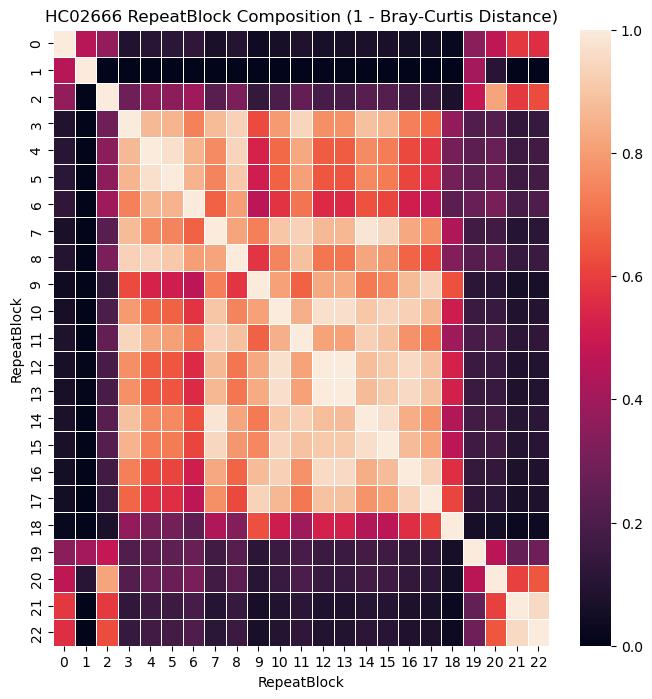

In [48]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,8
sns.heatmap(data=heatDF_mInfo3.sort_index(), linewidths=.7, annot=False, vmin=0)
plt.title("HC02666 RepeatBlock Composition (1 - Bray-Curtis Distance)")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_BrayCurtis_Heatmap_0", dpi=300, bbox_inches='tight')
plt.show()

In [49]:
brayc = heatDF_mInfo3.sort_index().copy()
for rb in brayc.index:
    
    topHit=0.0
    bestBlock = 0
    flag=0
    
    for block in brayc.loc[rb]:
        
        if float(block) != 1.0 and float(block) >= topHit:
            
            topHit=float(block)
            bestBlock = list(brayc.loc[rb].index)[flag]
            
            flag+=1
            
        else:
            flag+=1

    print("Repeat Block: "+str(rb))
    print("Highest Correlated Block: "+str(bestBlock))
    print("1 - (Bray-Curtis Distance): "+str(topHit))
    print("\n")

Repeat Block: 0
Highest Correlated Block: 21
1 - (Bray-Curtis Distance): 0.5833333333333333


Repeat Block: 1
Highest Correlated Block: 0
1 - (Bray-Curtis Distance): 0.4516129032258065


Repeat Block: 2
Highest Correlated Block: 20
1 - (Bray-Curtis Distance): 0.8181818181818181


Repeat Block: 3
Highest Correlated Block: 11
1 - (Bray-Curtis Distance): 0.9415584415584416


Repeat Block: 4
Highest Correlated Block: 5
1 - (Bray-Curtis Distance): 0.9691629955947136


Repeat Block: 5
Highest Correlated Block: 4
1 - (Bray-Curtis Distance): 0.9691629955947136


Repeat Block: 6
Highest Correlated Block: 4
1 - (Bray-Curtis Distance): 0.8584905660377359


Repeat Block: 7
Highest Correlated Block: 14
1 - (Bray-Curtis Distance): 0.981029810298103


Repeat Block: 8
Highest Correlated Block: 4
1 - (Bray-Curtis Distance): 0.9387755102040817


Repeat Block: 9
Highest Correlated Block: 17
1 - (Bray-Curtis Distance): 0.9355371900826446


Repeat Block: 10
Highest Correlated Block: 12
1 - (Bray-Curtis Dis

In [50]:
################################### VISUALIZE TREE ####################################################

In [51]:
#This code finds the total space between repeat blocks, 0 has 0 since there the space before it starts is not counted
repeatBlockList = list(goodAluGroupDict.keys())
print(repeatBlockList)
BlockListDistance = {x:0 for x in repeatBlockList}
start = 0
for block in repeatBlockList:
    if block == 0:
        continue
    else:
        BlockListDistance[block] = int(goodAluGroupDict[block][0].split(" ")[6].strip()) - int(goodAluGroupDict[repeatBlockList[start]][-1].split(" ")[7].strip()) 
        start+=1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [52]:
#This code prepares the Dataframe to give basic overview of region
for row in rb_df.index:
    if rb_df.at[row,'RepeatBlock']>22:
        rb_df.at[row,'Color']='black'
    else:
        if 'C_' in str(rb_df.at[row,'Alu']):
            rb_df.at[row,'Color']='red'
        else:
            rb_df.at[row,'Color']='blue'

In [53]:
import turtle

In [54]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HC02666 Yq Heterochromatin Repeat Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(set(rb_df['RepeatBlock'])):
    
    totalAlus = len(rb_df[rb_df['RepeatBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Repeat Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['RepeatBlock']==key].copy() 
    for item in tempDF.index:
        
        if 'C_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(.5)

        
        elif '+_' in tempDF.at[item,'Alu']:
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Lengths']/20)
            turtle.left(90)
            turtle.forward(.5)

        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|█| 26/26 [07:30<00:00, 17


In [55]:
from PIL import Image

In [56]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [57]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HC02666/HC02666_YqHeterochromatin_RedBlue")

In [58]:
turtle.bye()

## Look at DYZ Sub Blocks Sizes 

In [59]:
tempHolderList = []
for x,y in collections.Counter(temprbDF3['Lengths']).items():
    for i in range(0,y):
        tempHolderList.append(x)
    
tempDF = pd.DataFrame(data=tempHolderList, columns=['Length'])
tempDF.head()

,Length
0,2214
1,2402
2,2402
3,2402
4,2402


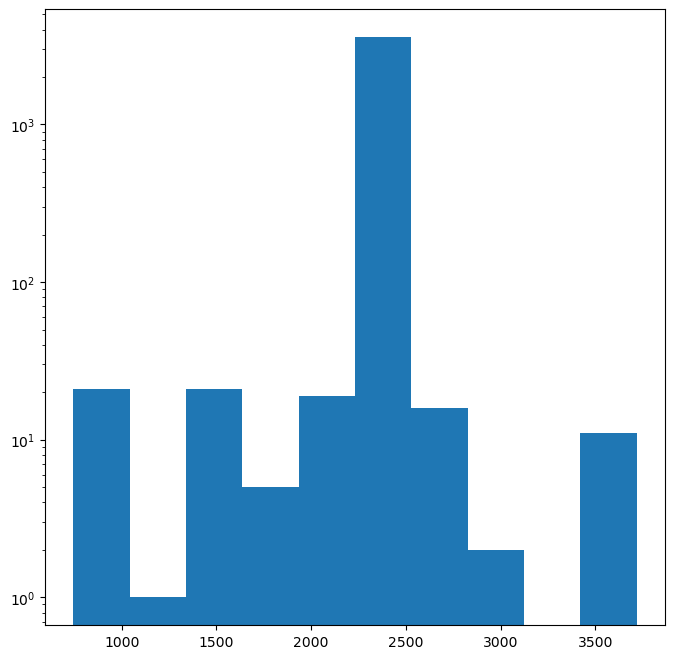

In [60]:
plt.hist(data=tempDF, x='Length', log=True)
plt.show()

In [61]:
goodAlus = []
tempDF_size = temprbDF3[(temprbDF3['Lengths']>2405) & (temprbDF3['Lengths']< 2415)].copy()

In [62]:
len(tempDF_size)/len(temprbDF3)

0.8613834422657952

In [64]:
for x, y in collections.Counter(tempDF_size['Lengths']).items():
    print("Length: "+str(x)+"\tTotal: "+str(y)+"\tPercentage: "+str(y/len(tempDF_size['Lengths'])))

Length: 2409	Total: 164	Percentage: 0.05184950995889978
Length: 2406	Total: 199	Percentage: 0.06291495415744547
Length: 2413	Total: 1352	Percentage: 0.42744230161239327
Length: 2411	Total: 464	Percentage: 0.1466961745178628
Length: 2412	Total: 500	Percentage: 0.15807777426493835
Length: 2410	Total: 210	Percentage: 0.06639266519127411
Length: 2414	Total: 98	Percentage: 0.030983243755927918
Length: 2408	Total: 124	Percentage: 0.03920328801770471
Length: 2407	Total: 52	Percentage: 0.016440088523553588


In [65]:
selectionDF = tempDF_size[tempDF_size['Lengths']==2413].reset_index().copy()
selectionDF

,RepeatBlock,index,Alu,Lengths,Group,Color,Block_Size
0,1,14,+_AluY_30915450-30915741,2413,[45977 4007 9.9 0.0 0.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1,1,19,+_AluY_30927544-30927835,2413,[45992 3988 9.7 0.0 0.0 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
2,1,28,+_AluY_30949327-30949618,2413,[46019 3866 10.9 0.0 0.0 chrY.01-24.01.PAR1-PA...,#06D6A0,2000-2999
3,2,42,C_AluY_31138961-31139252,2413,[46178 419 23.6 3.9 3.9 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
4,2,43,C_AluY_31141381-31141672,2413,[46181 367 19.8 9.1 2.9 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
...,...,...,...,...,...,...,...
1347,20,3637,C_AluY_53456904-53457195,2413,[65300 409 24.4 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1348,20,3639,C_AluY_53461742-53462033,2413,[65306 378 19.7 8.9 2.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1349,20,3642,C_AluY_53468996-53469287,2413,[65315 378 19.7 8.9 2.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999
1350,20,3646,C_AluY_53478668-53478959,2413,[65327 400 24.8 3.8 3.8 chrY.01-24.01.PAR1-PAR...,#06D6A0,2000-2999


In [66]:
goodRows=[]
for row in selectionDF.index:
    if "+_" in str(selectionDF.at[row,'Alu']):
        continue
    else:
        goodRows.append(row)
good_size_DF = selectionDF.loc[goodRows].copy()

In [67]:
collections.Counter(good_size_DF['Color'])

Counter({'#06D6A0': 1341})

In [ ]:
#with open("/home/mark/Desktop/chromosome_y/pille_alus.txt", "a+") as file:
#    for row in shuffledDF.index:
#        Start = int(shuffledDF.at[row,'Group'][0].split(" ")[5].strip())
#        End = int(shuffledDF.at[row,'Group'][-1].split(" ")[6].strip())
#        alu = str(shuffledDF.at[row,'Alu'])
#        file.write(str(alu)+"\t"+str(Start)+"\t"+str(End)+"\n")
#    file.close()